# 6.6. Sentiment Analysis using VADER 🎭

### 1. Warmup

#### 1.1. What is Sentiment Analysis?

* as an approach to NLP to identifies emotional tome behind the text(positive, negative or neutral).

#### 1.2. What use cases are there for Sentiment Analysis?

#### 1.3 What are some challenges faced when determing Sentiment in NLP?




* sarcasm
* typos, spelling, gramatical mistakes
* irony
* humour
* emojis
* inside jokes 
* slang/ dialect

### 2. Sentiment Analysis using VADER


In [ ]:
!pip install vaderSentiment

* VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based model for sentiment analysis that takes into account polarity (positive vs. negative) but also intensity of a sentiment.

In [1]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


#### VADER’s SentimentIntensityAnalyzer() takes in a string and returns a dictionary of scores in each of four categories:
- negative
- neutral
- positive
- compound 
- Note: The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive)

In [6]:
a = 'sneaky'

analyzer.polarity_scores(a)




{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.2263}

#### VADER analyses sentiments primarily based on certain key points:
    

Punctuation: The use of an exclamation mark(!), increases the magnitude of the intensity 
For example, “The party was good!” is more intense than “The party was good” and an increase in the number of (!), increases the magnitude accordingly.

In [9]:

analyzer.polarity_scores("The party was good!!!!!!!")

{'neg': 0.0, 'neu': 0.228, 'pos': 0.772, 'compound': 0.7762}

In [8]:

analyzer.polarity_scores("The party was good")

{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.6808}

Capitalization: Using upper case letters to emphasize a sentiment-relevant word in the presence of other non-capitalized words, increases the magnitude of the sentiment intensity. For example, “The party was GREAT!” conveys more intensity than “The party was great!”





In [22]:

analyzer.polarity_scores("The party was awesome to none")

{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.7783}

In [24]:

analyzer.polarity_scores("The party was shit!")

{'neg': 0.453, 'neu': 0.233, 'pos': 0.314, 'compound': -0.2942}

Degree modifiers: Also called intensifiers, they impact the sentiment intensity by either increasing or decreasing the intensity. For example, “The service here is extremely good” is more intense than “The service here is good”, whereas “The service here is marginally good” reduces the intensity.


In [25]:

analyzer.polarity_scores("The service here is extremely good")

{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.4927}

In [27]:


analyzer.polarity_scores("Am I evil?")


{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.6597}

Conjunctions: Use of conjunctions like “but” signals a shift in sentiment polarity, with the sentiment of the text following the conjunction being dominant. “The music here is great, but the service is horrible” has mixed sentiment, with the latter half dictating the overall rating.


In [39]:
analyzer.polarity_scores("yoyo")

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.1027}

Preceding Tri-gram: By examining the tri-gram preceding a sentiment-laden lexical feature, we catch nearly 90% of cases where negation flips the polarity of the text. A negated sentence would be “The music here isn’t really all that great”.


In [41]:
analyzer.polarity_scores("You are stupid")

{'neg': 0.63, 'neu': 0.37, 'pos': 0.0, 'compound': -0.5267}

What do we notice about the scores?

* Scores give the proportion of text belonging to the category.
* compund: most valuable parameter, thresholds mentioned in repo:
- positive sentiment: compound score >= 0.05
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- negative sentiment: compound score <= -0.05

In [40]:
import pandas as pd

In [42]:
sentences = ["The party was good!","The party was good","The party was GREAT!","The party was great!","The service here is extremely good",
             "The service here is marginally good","The music here is great, but the service is horrible","The music here isn’t really all that great :("] 
neg = []
neu = []
pos = []
compound = []

s = SentimentIntensityAnalyzer()
for sentence in sentences:
    score = s.polarity_scores(sentence)
    neg.append(score['neg'])
    neu.append(score['neu'])
    pos.append(score['pos'])
    compound.append(score['compound'])

In [43]:
df = pd.DataFrame({'sentence':sentences, 'neg': neg, 'neutral':neu, 'pos':pos, 'compound': compound})

In [44]:
df

,sentence,neg,neutral,pos,compound
0,The party was good!,0.000,0.253,0.747,0.7088
1,The party was good,0.000,0.263,0.737,0.6808
2,The party was GREAT!,0.000,0.204,0.796,0.8327
3,The party was great!,0.000,0.220,0.780,0.7959
4,The service here is extremely good,0.000,0.610,0.390,0.4927
5,The service here is marginally good,0.000,0.657,0.343,0.3832
6,"The music here is great, but the service is ho...",0.310,0.523,0.167,-0.4939
7,The music here isn’t really all that great :(,0.203,0.491,0.306,0.3535


<AxesSubplot:>

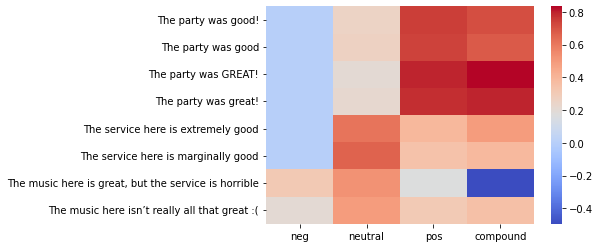

In [45]:
import seaborn as sns
sns.heatmap(df.drop('sentence', axis = 1), yticklabels = df['sentence'], cmap = "coolwarm")

<AxesSubplot:>

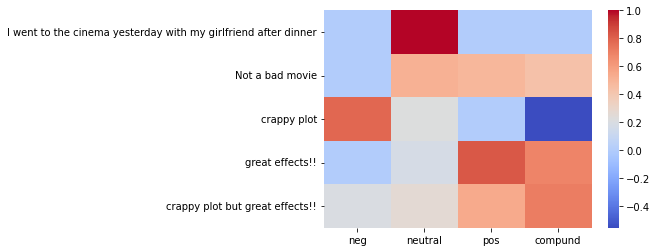

In [46]:
sentences = ['I went to the cinema yesterday with my girlfriend after dinner', 'Not a bad movie', 'crappy plot', 'great effects!!', 
             'crappy plot but great effects!!'] 
neg = []
neu = []
pos = []
compound = []

s = SentimentIntensityAnalyzer()
for sentence in sentences:
    score = s.polarity_scores(sentence)
    neg.append(score['neg'])
    neu.append(score['neu'])
    pos.append(score['pos'])
    compound.append(score['compound'])
df = pd.DataFrame({'sentence':sentences, 'neg': neg, 'neutral':neu, 'pos':pos, 'compund': compound})
sns.heatmap(df.drop('sentence', axis = 1), yticklabels = df['sentence'], cmap = "coolwarm")

## 3. Toy dataset:  Analysing Tweets

In [ ]:
!pip install nltk

In [47]:
import nltk
from nltk.corpus import twitter_samples 
import pandas as pd

# get 5000 positive and negative tweets


In [48]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [50]:
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
for string in all_negative_tweets[:5]:
    print(string)

hopeless for tmr :(
Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
@Hegelbon That heart sliding into the waste basket. :(
“@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too
Dang starting next week I have "work" :(


In [49]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
for string in all_positive_tweets[:5]:
    print(string)

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
@97sides CONGRATS :)
yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days


In [51]:
analyzer.polarity_scores(all_positive_tweets[0])

{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.7579}

In [52]:
analyzer.polarity_scores(all_negative_tweets[0])

{'neg': 0.747, 'neu': 0.253, 'pos': 0.0, 'compound': -0.7096}

In [53]:
all_positive_tweets.extend(all_negative_tweets)

In [54]:
df_tweets = pd.DataFrame({'tweets' : all_positive_tweets})
 
df_tweets

,tweets
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,@Lamb2ja Hey James! How odd :/ Please call our...
2,@DespiteOfficial we had a listen last night :)...
3,@97sides CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...
...,...
9995,I wanna change my avi but uSanele :(
9996,MY PUPPY BROKE HER FOOT :(
9997,where's all the jaebum baby pictures :((
9998,But but Mr Ahmad Maslan cooks too :( https://t...


### 3.1 Clean data


In [55]:
import re

In [56]:
mentions_regex= '@[A-Za-z0-9]+'
url_regex='https?:\/\/\S+' #this will not catch all possible URLs
hashtag_regex= '#'
rt_regex= 'RT\s'

def clean_tweets(tweet):
    tweet = re.sub(mentions_regex, '', tweet)  #removes @mentions
    tweet = re.sub(hashtag_regex, '', tweet) #removes hashtag symbol
    tweet = re.sub(rt_regex, '', tweet) #removes RT to announce retweet
    tweet = re.sub(url_regex, '', tweet) #removes most URLs
    
    return tweet



In [58]:
df_tweets.tweets = df_tweets.tweets.apply(clean_tweets)
df_tweets

,tweets
0,FollowFriday _Inte _Paris for being top engag...
1,Hey James! How odd :/ Please call our Contact...
2,we had a listen last night :) As You Bleed is...
3,CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...
...,...
9995,I wanna change my avi but uSanele :(
9996,MY PUPPY BROKE HER FOOT :(
9997,where's all the jaebum baby pictures :((
9998,But but Mr Ahmad Maslan cooks too :(


### 3.2 Calculating scores

In [64]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [65]:
df_tweets.head(3)

,tweets
0,FollowFriday _Inte _Paris for being top engag...
1,Hey James! How odd :/ Please call our Contact...
2,we had a listen last night :) As You Bleed is...


In [66]:
# Make dataframe of polarity scores
pol_scores = df_tweets['tweets'].apply(analyser.polarity_scores).apply(pd.Series)
pol_scores.head(3)



,neg,neu,pos,compound
0,0.000,0.595,0.405,0.7579
1,0.149,0.572,0.279,0.6229
2,0.000,0.706,0.294,0.7959



### Further Reading:

* https://www.kaggle.com/piyushagni5/sentiment-analysis-on-twitter-dataset-nlp

* https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews

* https://textblob.readthedocs.io/en/dev/



Methods based on word embeddings (Deep Learning):
https://medium.com/analytics-vidhya/training-your-own-sentiment-analyzer-with-spacy-9b924df1514c
https://nlp.stanford.edu/sentiment/


### Next step:
* Get tweets from MongoDB
* Clean the tweets
* Do sentiment analysis with VADER
* Save tweet and sentiment in postgres
